In [44]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [19]:
df = pd.read_csv(r"..\Nepal real time dataset\nepal_timeseries.csv")

In [20]:
df

,Date,Confirmed,Recovered,Death
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,1,0,0
4,2020-01-26,1,0,0
...,...,...,...,...
117,2020-05-18,375,36,2
118,2020-05-19,402,37,2
119,2020-05-20,427,45,2
120,2020-05-21,457,49,3


In [21]:
df.isnull()

,Date,Confirmed,Recovered,Death
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
117,False,False,False,False
118,False,False,False,False
119,False,False,False,False
120,False,False,False,False


In [23]:
df.isnull().sum()

Date         0
Confirmed    0
Recovered    0
Death        0
dtype: int64

In [25]:
df = df.dropna()

In [27]:
df.isna().sum()

Date         0
Confirmed    0
Recovered    0
Death        0
dtype: int64

In [28]:
df

,Date,Confirmed,Recovered,Death
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,1,0,0
4,2020-01-26,1,0,0
...,...,...,...,...
117,2020-05-18,375,36,2
118,2020-05-19,402,37,2
119,2020-05-20,427,45,2
120,2020-05-21,457,49,3


In [29]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [30]:
print(df.dtypes)

Date         datetime64[ns]
Confirmed             int64
Recovered             int64
Death                 int64
dtype: object


<Axes: title={'center': 'Death over time'}>

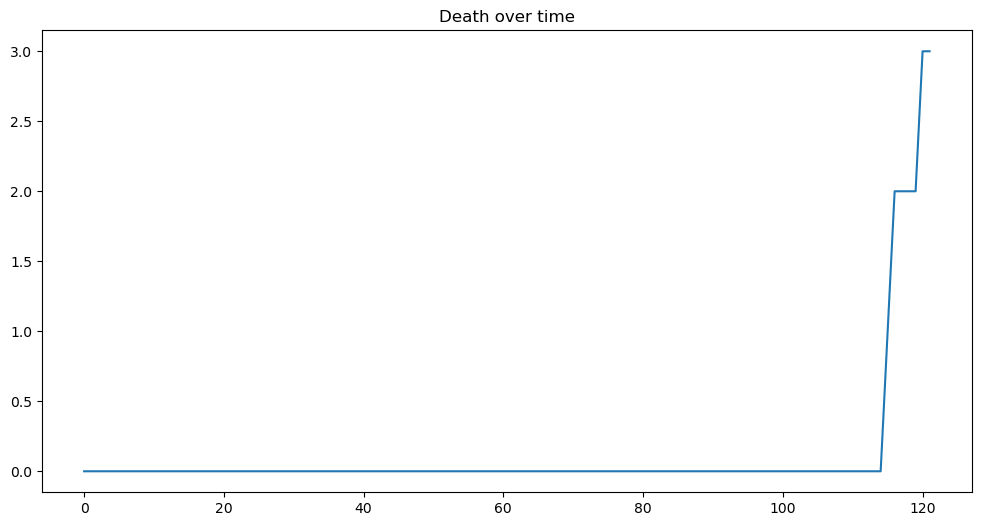

In [34]:
df['Death'].plot(figsize=(12,6), title="Death over time")

In [39]:
def create_dataset(df, window_size=7):
    X = []
    y = []
    
    for i in range(len(df) - window_size):
        X.append(df['Death'].iloc[i:i+window_size].values)
        y.append(df['Death'].iloc[i+window_size])
    
    X = np.array(X)
    y = np.array(y)
    
    print(f"Total windows created: {len(X)}")
    
    return X, y
  
window_size = 7
X, y = create_dataset(df, window_size)
  

Total windows created: 115


In [40]:
train_size = int(len(X)*0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [41]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 7) (80,) (35, 7) (35,)


In [38]:
print("Length of the dataset:", len(df))

Length of the dataset: 122


In [42]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [47]:
model = Sequential([
    LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
3/3 [==============================] - 5s 342ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 2/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 3/20
3/3 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 4/20
3/3 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 5/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 6/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 7/20
3/3 [==============================] - 0s 28ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 8/20
3/3 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 9/20
3/3 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - val_loss: 0.8480
Epoch 10/20
3/3 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - val_l

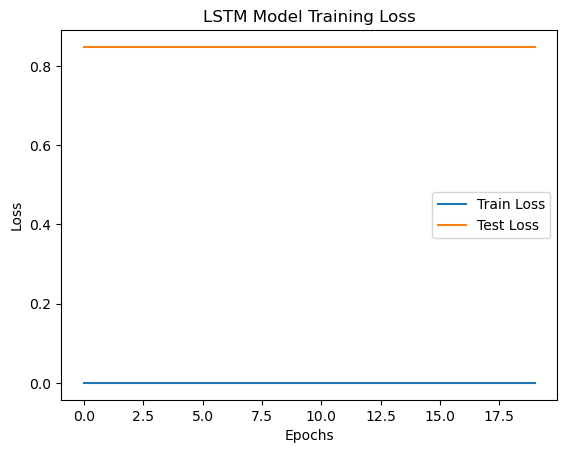

In [51]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("LSTM Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [52]:
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

2/2 [==============================] - 0s 3ms/step - loss: 0.8480
Test Loss: 0.8479662537574768


2/2 [==============================] - 1s 20ms/step


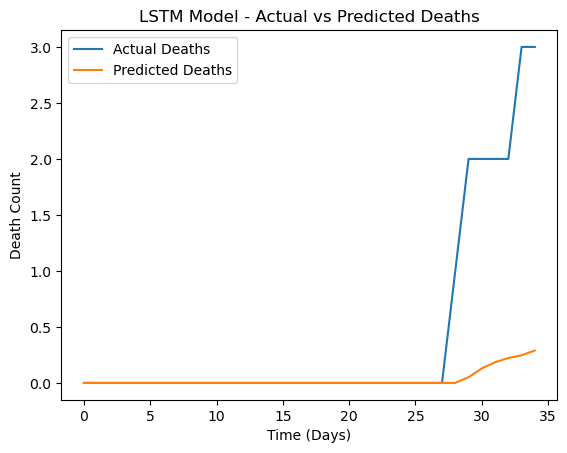

In [53]:
y_pred = model.predict(X_test)

# Plot the predicted vs actual values
plt.plot(y_test, label='Actual Deaths')
plt.plot(y_pred, label='Predicted Deaths')
plt.legend()
plt.title("LSTM Model - Actual vs Predicted Deaths")
plt.xlabel("Time (Days)")
plt.ylabel("Death Count")
plt.show()

In [ ]:
##The model still has error and can predict the spike change in the death 